In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_excel("E:\ICC Test Bat 3001.xlsx")

In [3]:
data

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,CA Snedden (NZ),1947-1947,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2997,VN Swamy (INDIA),1955-1955,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2998,Usman Shinwari (PAK),2019-2019,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2999,CM Willoughby (SA),2003-2003,2,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...


# Data cleaning

Remove the unwanted columns

In [4]:
data=data.drop(columns=["Player Profile"])

In [5]:
data.index = range(1, len(data) + 1)

In [6]:
data.head(50)

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0
1,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14
2,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17
3,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16
4,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8
5,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9
6,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.4,38,52,11
7,BC Lara (ICC/WI),1990-2006,131,232,6,11953,400*,52.88,34,48,17
8,S Chanderpaul (WI),1994-2015,164,280,49,11867,203*,51.37,30,66,15
9,DPMD Jayawardene (SL),1997-2014,149,252,15,11814,374,49.84,34,50,15
10,AR Border (AUS),1978-1994,156,265,44,11174,205,50.56,27,63,11


In [7]:
data.isnull().sum()

Player    0
Span      0
Mat       0
Inn       0
NO        0
Runs      0
HS        0
Avg       0
100       0
50        0
0         0
dtype: int64

In [8]:
data

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0
1,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14
2,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17
3,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16
4,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8
5,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9
...,...,...,...,...,...,...,...,...,...,...,...
2997,CA Snedden (NZ),1947-1947,1,-,-,-,-,-,-,-,-
2998,VN Swamy (INDIA),1955-1955,1,-,-,-,-,-,-,-,-
2999,Usman Shinwari (PAK),2019-2019,1,-,-,-,-,-,-,-,-
3000,CM Willoughby (SA),2003-2003,2,-,-,-,-,-,-,-,-


Replace the column name

In [9]:
data1=data.rename(columns={100:"Hundred",
                         50:"Fifty",
                         0:'Zero',
                         'AVG':'avg'
                         })

Replace the  '-'  value to NaN value

In [10]:
data1.replace("-", np.nan, inplace=True)

In [11]:
data1

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921.0,248*,53.78,51.0,68.0,14.0
2,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378.0,257,51.85,41.0,62.0,17.0
3,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289.0,224,55.37,45.0,58.0,16.0
4,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288.0,270,52.31,36.0,63.0,8.0
5,AN Cook (ENG),2006-2018,161,291.0,16.0,12472.0,294,45.35,33.0,57.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2997,CA Snedden (NZ),1947-1947,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998,VN Swamy (INDIA),1955-1955,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2999,Usman Shinwari (PAK),2019-2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000,CM Willoughby (SA),2003-2003,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data1.shape

(3001, 11)

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 1 to 3001
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   3001 non-null   object 
 1   Span     3001 non-null   object 
 2   Mat      3001 non-null   int64  
 3   Inn      2981 non-null   float64
 4   NO       2981 non-null   float64
 5   Runs     2981 non-null   float64
 6   HS       2981 non-null   object 
 7   Avg      2913 non-null   float64
 8   Hundred  2981 non-null   float64
 9   Fifty    2981 non-null   float64
 10  Zero     2981 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 258.0+ KB


In [14]:
data1.isnull().sum()

Player      0
Span        0
Mat         0
Inn        20
NO         20
Runs       20
HS         20
Avg        88
Hundred    20
Fifty      20
Zero       20
dtype: int64

Remove the Avg null values

In [15]:
data1.loc[data1.Avg.isnull()]

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1959,Afaq Hussain (PAK),1961-1964,2,4.0,4.0,66.0,35*,NaN,0.0,0.0,0.0
2068,SG Law (AUS),1995-1995,1,1.0,1.0,54.0,54*,NaN,0.0,1.0,0.0
2309,CG Halse (SA),1964-1964,3,3.0,3.0,30.0,19*,NaN,0.0,0.0,0.0
2336,FAW Freer (AUS),1946-1946,1,1.0,1.0,28.0,28*,NaN,0.0,0.0,0.0
2364,IW Callen (AUS),1978-1978,1,2.0,2.0,26.0,22*,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2997,CA Snedden (NZ),1947-1947,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998,VN Swamy (INDIA),1955-1955,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2999,Usman Shinwari (PAK),2019-2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000,CM Willoughby (SA),2003-2003,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data1=data1.dropna(subset=["Avg"]) #Which column have null values remove the entire rows

In [17]:
data1.isnull().sum()

Player     0
Span       0
Mat        0
Inn        0
NO         0
Runs       0
HS         0
Avg        0
Hundred    0
Fifty      0
Zero       0
dtype: int64

In [18]:
data1.loc[data1.Avg.isnull()]

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero


In [19]:
data1.loc[(data1.Hundred>=20) & (data1.Hundred<30)].sort_values(by=['Mat'])

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
53,DG Bradman (AUS),1928-1948,52,80.0,10.0,6996.0,334,99.94,29.0,13.0,7.0
48,SPD Smith (AUS),2010-2019,72,130.0,16.0,7164.0,239,62.84,26.0,28.0,4.0
60,KS Williamson (NZ),2010-2019,78,137.0,13.0,6379.0,242*,51.44,21.0,31.0,9.0
66,RN Harvey (AUS),1948-1963,79,137.0,10.0,6149.0,205,48.41,21.0,24.0,7.0
57,KF Barrington (ENG),1955-1968,82,131.0,15.0,6806.0,256,58.67,20.0,35.0,5.0
51,DA Warner (AUS),2011-2019,83,153.0,6.0,7088.0,335*,48.21,23.0,30.0,9.0
46,V Kohli (INDIA),2011-2019,84,141.0,10.0,7202.0,254*,54.97,27.0,22.0,10.0
43,WR Hammond (ENG),1927-1947,85,140.0,16.0,7249.0,336*,58.45,22.0,24.0,4.0
50,GS Chappell (AUS),1970-1984,87,151.0,19.0,7110.0,247*,53.86,24.0,31.0,12.0
36,Mohammad Yousuf (PAK),1998-2010,90,156.0,12.0,7530.0,223,52.29,24.0,33.0,11.0


 which row of avg is 0.0 remove and this entire row


In [20]:
data1.loc[data1.Avg==0.0]

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
2931,SA Banerjee (INDIA),1948-1949,1,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0
2932,JE Benjamin (ENG),1994-1994,1,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0
2933,GE Bond (SA),1938-1938,1,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0
2934,LA Butterfield (NZ),1946-1946,1,2.0,0.0,0.0,0,0.0,0.0,0.0,2.0
2935,DW Carr (ENG),1909-1909,1,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0
2936,GA Chevalier (SA),1970-1970,1,2.0,1.0,0.0,0*,0.0,0.0,0.0,1.0
2937,SP Davis (AUS),1986-1986,1,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0
2938,CD Dixon (SA),1914-1914,1,2.0,0.0,0.0,0,0.0,0.0,0.0,2.0
2939,JH du Preez (SA),1967-1967,2,2.0,0.0,0.0,0,0.0,0.0,0.0,2.0
2940,GF Grace (ENG),1880-1880,1,2.0,0.0,0.0,0,0.0,0.0,0.0,2.0


 which rows of avg is less than 30 remove and this entire row

In [21]:
data2=data1.loc[data1.Avg<30].index # This condition is using to select the index

In [22]:
data2

Int64Index([ 119,  154,  167,  185,  186,  187,  191,  203,  204,  207,
            ...
            2970, 2971, 2972, 2973, 2974, 2975, 2976, 2978, 2980, 2981],
           dtype='int64', length=2225)

In [23]:
data1.drop(data2,inplace=True)

C:\Users\gnane\AppData\Local\Temp\ipykernel_2304\1678952577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(data2,inplace=True)


In [24]:
data1

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921.0,248*,53.78,51.0,68.0,14.0
2,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378.0,257,51.85,41.0,62.0,17.0
3,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289.0,224,55.37,45.0,58.0,16.0
4,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288.0,270,52.31,36.0,63.0,8.0
5,AN Cook (ENG),2006-2018,161,291.0,16.0,12472.0,294,45.35,33.0,57.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2236,NF Williams (ENG),1990-1990,1,1.0,0.0,38.0,38,38.00,0.0,0.0,0.0
2286,DW Richardson (ENG),1957-1957,1,1.0,0.0,33.0,33,33.00,0.0,0.0,0.0
2295,AG Archer (ENG),1899-1899,1,2.0,1.0,31.0,24*,31.00,0.0,0.0,0.0
2318,JW Rutherford (AUS),1956-1956,1,1.0,0.0,30.0,30,30.00,0.0,0.0,0.0


which player not score Hundred and fifty remove and this player stats

In [25]:
data3=data1[(data1['Hundred']==0.0) & (data1["Fifty"]==0.0)].index

In [26]:
data3

Int64Index([1724, 1726, 1744, 1882, 1930, 1960, 1972, 1975, 1979, 1983, 1996,
            2012, 2093, 2115, 2118, 2126, 2147, 2150, 2152, 2176, 2181, 2189,
            2196, 2202, 2219, 2236, 2286, 2295, 2318, 2322],
           dtype='int64')

In [27]:
data1.drop(data3,inplace=True)

C:\Users\gnane\AppData\Local\Temp\ipykernel_2304\666023383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(data3,inplace=True)


In [28]:
data1

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921.0,248*,53.78,51.0,68.0,14.0
2,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378.0,257,51.85,41.0,62.0,17.0
3,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289.0,224,55.37,45.0,58.0,16.0
4,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288.0,270,52.31,36.0,63.0,8.0
5,AN Cook (ENG),2006-2018,161,291.0,16.0,12472.0,294,45.35,33.0,57.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
1926,P Roy (INDIA),1982-1982,2,3.0,1.0,71.0,60*,35.50,0.0,1.0,0.0
1978,JH King (ENG),1909-1909,1,2.0,0.0,64.0,60,32.00,0.0,1.0,0.0
2009,MJ Horton (ENG),1959-1959,2,2.0,0.0,60.0,58,30.00,0.0,1.0,0.0
2031,JA Morkel (SA),2009-2009,1,1.0,0.0,58.0,58,58.00,0.0,1.0,0.0


Reset the index

In [29]:
data1.reset_index(drop=True,inplace=True)

In [30]:
data1

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
0,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921.0,248*,53.78,51.0,68.0,14.0
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378.0,257,51.85,41.0,62.0,17.0
2,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289.0,224,55.37,45.0,58.0,16.0
3,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288.0,270,52.31,36.0,63.0,8.0
4,AN Cook (ENG),2006-2018,161,291.0,16.0,12472.0,294,45.35,33.0,57.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
653,P Roy (INDIA),1982-1982,2,3.0,1.0,71.0,60*,35.50,0.0,1.0,0.0
654,JH King (ENG),1909-1909,1,2.0,0.0,64.0,60,32.00,0.0,1.0,0.0
655,MJ Horton (ENG),1959-1959,2,2.0,0.0,60.0,58,30.00,0.0,1.0,0.0
656,JA Morkel (SA),2009-2009,1,1.0,0.0,58.0,58,58.00,0.0,1.0,0.0


# Sort the values by hundred in base of each country

In [31]:
ind=data1.loc[data1.Player.str.contains("INDIA")].sort_values(by="Hundred",ascending=False)

In [32]:
ind

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
0,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921.0,248*,53.78,51.0,68.0,14.0
3,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288.0,270,52.31,36.0,63.0,8.0
11,SM Gavaskar (INDIA),1971-1987,125,214.0,16.0,10122.0,236*,51.12,34.0,45.0,12.0
45,V Kohli (INDIA),2011-2019,84,141.0,10.0,7202.0,254*,54.97,27.0,22.0,10.0
22,V Sehwag (ICC/INDIA),2001-2013,104,180.0,6.0,8586.0,319,49.34,23.0,32.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
594,BS Sandhu (INDIA),1983-1983,8,11.0,4.0,214.0,71,30.57,0.0,2.0,1.0
595,DJ Gandhi (INDIA),1999-1999,4,7.0,1.0,204.0,88,34.00,0.0,2.0,2.0
612,C Ramaswami (INDIA),1936-1936,2,4.0,1.0,170.0,60,56.66,0.0,1.0,0.0
649,Yuvraj of Patiala (INDIA),1934-1934,1,2.0,0.0,84.0,60,42.00,0.0,1.0,0.0


In [33]:
ind.reset_index(drop=True,inplace=True)
ind.index = range(1, len(ind) + 1)

In [34]:
ind

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921.0,248*,53.78,51.0,68.0,14.0
2,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288.0,270,52.31,36.0,63.0,8.0
3,SM Gavaskar (INDIA),1971-1987,125,214.0,16.0,10122.0,236*,51.12,34.0,45.0,12.0
4,V Kohli (INDIA),2011-2019,84,141.0,10.0,7202.0,254*,54.97,27.0,22.0,10.0
5,V Sehwag (ICC/INDIA),2001-2013,104,180.0,6.0,8586.0,319,49.34,23.0,32.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
70,BS Sandhu (INDIA),1983-1983,8,11.0,4.0,214.0,71,30.57,0.0,2.0,1.0
71,DJ Gandhi (INDIA),1999-1999,4,7.0,1.0,204.0,88,34.00,0.0,2.0,2.0
72,C Ramaswami (INDIA),1936-1936,2,4.0,1.0,170.0,60,56.66,0.0,1.0,0.0
73,Yuvraj of Patiala (INDIA),1934-1934,1,2.0,0.0,84.0,60,42.00,0.0,1.0,0.0


In [35]:
eng=data1.loc[data1.Player.str.contains("ENG")].sort_values(by="Hundred",ascending=False)

In [36]:
eng

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
4,AN Cook (ENG),2006-2018,161,291.0,16.0,12472.0,294,45.35,33.0,57.0,9.0
26,KP Pietersen (ENG),2005-2014,104,181.0,8.0,8181.0,227,47.28,23.0,35.0,10.0
33,MC Cowdrey (ENG),1954-1975,114,188.0,15.0,7624.0,182,44.06,22.0,38.0,9.0
27,G Boycott (ENG),1964-1982,108,193.0,23.0,8114.0,246*,47.72,22.0,42.0,10.0
42,WR Hammond (ENG),1927-1947,85,140.0,16.0,7249.0,336*,58.45,22.0,24.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
537,Lord Tennyson (ENG),1913-1921,9,12.0,1.0,345.0,74*,31.36,0.0,4.0,1.0
531,MJ Stewart (ENG),1962-1964,8,12.0,1.0,385.0,87,35.00,0.0,2.0,1.0
530,CL Smith (ENG),1983-1986,8,14.0,1.0,392.0,91,30.15,0.0,2.0,1.0
504,JB Bolus (ENG),1963-1964,7,12.0,0.0,496.0,88,41.33,0.0,4.0,0.0


In [37]:
eng.reset_index(drop=True,inplace=True)
eng.index = range(1, len(eng) + 1)

In [38]:
eng

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,AN Cook (ENG),2006-2018,161,291.0,16.0,12472.0,294,45.35,33.0,57.0,9.0
2,KP Pietersen (ENG),2005-2014,104,181.0,8.0,8181.0,227,47.28,23.0,35.0,10.0
3,MC Cowdrey (ENG),1954-1975,114,188.0,15.0,7624.0,182,44.06,22.0,38.0,9.0
4,G Boycott (ENG),1964-1982,108,193.0,23.0,8114.0,246*,47.72,22.0,42.0,10.0
5,WR Hammond (ENG),1927-1947,85,140.0,16.0,7249.0,336*,58.45,22.0,24.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
144,Lord Tennyson (ENG),1913-1921,9,12.0,1.0,345.0,74*,31.36,0.0,4.0,1.0
145,MJ Stewart (ENG),1962-1964,8,12.0,1.0,385.0,87,35.00,0.0,2.0,1.0
146,CL Smith (ENG),1983-1986,8,14.0,1.0,392.0,91,30.15,0.0,2.0,1.0
147,JB Bolus (ENG),1963-1964,7,12.0,0.0,496.0,88,41.33,0.0,4.0,0.0


In [39]:
SA=data1.loc[data1.Player.str.contains("SA")].sort_values(by="Hundred",ascending=False)

In [40]:
SA.reset_index(drop=True,inplace=True)
SA.index = range(1, len(SA) + 1)

In [41]:
SA

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289.0,224,55.37,45.0,58.0,16.0
2,HM Amla (SA),2004-2019,124,215.0,16.0,9282.0,311*,46.64,28.0,41.0,13.0
3,GC Smith (ICC/SA),2002-2014,117,205.0,13.0,9265.0,277,48.25,27.0,38.0,11.0
4,AB de Villiers (SA),2004-2018,114,191.0,18.0,8765.0,278*,50.66,22.0,46.0,8.0
5,G Kirsten (SA),1993-2004,101,176.0,15.0,7289.0,275,45.27,21.0,34.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...
60,CM Francois (SA),1922-1923,5,9.0,1.0,252.0,72,31.50,0.0,1.0,0.0
61,MJ Susskind (SA),1924-1924,5,8.0,0.0,268.0,65,33.50,0.0,4.0,0.0
62,A Bacher (SA),1965-1970,12,22.0,1.0,679.0,73,32.33,0.0,6.0,1.0
63,HB Cameron (SA),1927-1935,26,45.0,4.0,1239.0,90,30.21,0.0,10.0,3.0


In [42]:
NZ=data1.loc[data1.Player.str.contains("NZ")].sort_values(by="Hundred",ascending=False)

In [43]:
NZ.reset_index(drop=True,inplace=True)
NZ.index = range(1, len(NZ) + 1)

In [44]:
NZ

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,KS Williamson (NZ),2010-2019,78,137.0,13.0,6379.0,242*,51.44,21.0,31.0,9.0
2,LRPL Taylor (NZ),2007-2019,98,173.0,20.0,7130.0,290,46.60,19.0,33.0,14.0
3,MD Crowe (NZ),1982-1995,77,131.0,11.0,5444.0,299,45.36,17.0,18.0,9.0
4,BB McCullum (NZ),2004-2016,101,176.0,9.0,6453.0,302,38.64,12.0,31.0,14.0
5,JG Wright (NZ),1978-1993,82,148.0,7.0,5334.0,185,37.82,12.0,23.0,7.0
6,NJ Astle (NZ),1996-2006,81,137.0,10.0,4702.0,222,37.02,11.0,24.0,11.0
7,TWM Latham (NZ),2014-2019,49,86.0,3.0,3554.0,264*,42.81,11.0,16.0,8.0
8,SP Fleming (NZ),1994-2008,111,189.0,10.0,7172.0,274*,40.06,9.0,46.0,16.0
9,BJ Watling (NZ),2009-2019,67,106.0,15.0,3616.0,205,39.73,8.0,18.0,9.0
10,GM Turner (NZ),1969-1983,41,73.0,6.0,2991.0,259,44.64,7.0,14.0,1.0


In [45]:
WI=data1.loc[data1.Player.str.contains("WI")].sort_values(by='Hundred',ascending=False)

In [46]:
WI

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
6,BC Lara (ICC/WI),1990-2006,131,232.0,6.0,11953.0,400*,52.88,34.0,48.0,17.0
7,S Chanderpaul (WI),1994-2015,164,280.0,49.0,11867.0,203*,51.37,30.0,66.0,15.0
28,GS Sobers (WI),1954-1974,93,160.0,21.0,8032.0,365*,57.78,26.0,30.0,12.0
23,IVA Richards (WI),1974-1991,121,182.0,12.0,8540.0,291,50.23,24.0,45.0,10.0
34,CG Greenidge (WI),1974-1991,108,185.0,16.0,7558.0,226,44.72,19.0,34.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
635,AB Fudadin (WI),2012-2012,3,5.0,1.0,122.0,55,30.50,0.0,1.0,0.0
445,JDC Goddard (WI),1948-1957,27,39.0,11.0,859.0,83*,30.67,0.0,4.0,5.0
639,KR Rickards (WI),1948-1952,2,3.0,0.0,104.0,67,34.66,0.0,1.0,0.0
644,VH Stollmeyer (WI),1939-1939,1,1.0,0.0,96.0,96,96.00,0.0,1.0,0.0


In [47]:
WI.reset_index(drop=True,inplace=True)
WI.index = range(1, len(WI) + 1)

In [48]:
WI

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,BC Lara (ICC/WI),1990-2006,131,232.0,6.0,11953.0,400*,52.88,34.0,48.0,17.0
2,S Chanderpaul (WI),1994-2015,164,280.0,49.0,11867.0,203*,51.37,30.0,66.0,15.0
3,GS Sobers (WI),1954-1974,93,160.0,21.0,8032.0,365*,57.78,26.0,30.0,12.0
4,IVA Richards (WI),1974-1991,121,182.0,12.0,8540.0,291,50.23,24.0,45.0,10.0
5,CG Greenidge (WI),1974-1991,108,185.0,16.0,7558.0,226,44.72,19.0,34.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
73,AB Fudadin (WI),2012-2012,3,5.0,1.0,122.0,55,30.50,0.0,1.0,0.0
74,JDC Goddard (WI),1948-1957,27,39.0,11.0,859.0,83*,30.67,0.0,4.0,5.0
75,KR Rickards (WI),1948-1952,2,3.0,0.0,104.0,67,34.66,0.0,1.0,0.0
76,VH Stollmeyer (WI),1939-1939,1,1.0,0.0,96.0,96,96.00,0.0,1.0,0.0


In [49]:
data1.loc[data1.Player.str.contains('AUS')].sort_values(by='Hundred',ascending=False)

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378.0,257,51.85,41.0,62.0,17.0
10,SR Waugh (AUS),1985-2004,168,260.0,46.0,10927.0,200,51.06,32.0,50.0,22.0
21,ML Hayden (AUS),1994-2009,103,184.0,14.0,8625.0,380,50.73,30.0,29.0,14.0
52,DG Bradman (AUS),1928-1948,52,80.0,10.0,6996.0,334,99.94,29.0,13.0,7.0
20,MJ Clarke (AUS),2004-2015,115,198.0,22.0,8643.0,329*,49.10,28.0,27.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
335,KD Mackay (AUS),1956-1963,37,52.0,7.0,1507.0,89,33.48,0.0,13.0,6.0
450,TR Veivers (AUS),1963-1967,21,30.0,4.0,813.0,88,31.26,0.0,7.0,3.0
357,BM Laird (AUS),1979-1982,21,40.0,2.0,1341.0,92,35.28,0.0,11.0,2.0
525,AG Fairfax (AUS),1929-1931,10,12.0,4.0,410.0,65,51.25,0.0,4.0,0.0


In [50]:
AUS=data1.loc[data1.Player.str.contains("AUS")].sort_values(by='Hundred',ascending=False)

In [51]:
AUS.reset_index(drop=True,inplace=True)
AUS.index = range(1, len(AUS) + 1)

In [52]:
AUS

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378.0,257,51.85,41.0,62.0,17.0
2,SR Waugh (AUS),1985-2004,168,260.0,46.0,10927.0,200,51.06,32.0,50.0,22.0
3,ML Hayden (AUS),1994-2009,103,184.0,14.0,8625.0,380,50.73,30.0,29.0,14.0
4,DG Bradman (AUS),1928-1948,52,80.0,10.0,6996.0,334,99.94,29.0,13.0,7.0
5,MJ Clarke (AUS),2004-2015,115,198.0,22.0,8643.0,329*,49.10,28.0,27.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
113,KD Mackay (AUS),1956-1963,37,52.0,7.0,1507.0,89,33.48,0.0,13.0,6.0
114,TR Veivers (AUS),1963-1967,21,30.0,4.0,813.0,88,31.26,0.0,7.0,3.0
115,BM Laird (AUS),1979-1982,21,40.0,2.0,1341.0,92,35.28,0.0,11.0,2.0
116,AG Fairfax (AUS),1929-1931,10,12.0,4.0,410.0,65,51.25,0.0,4.0,0.0


Observation:which Player are most hundred in each country

1.India->Sachin Ramesh Tendulkar

2.SouthAfrica-> JH Kallis

3.England-> AN cook

4.Newzeland-> Kane williamson

5.Australia->Ricky Ponting

6.West Indies-> Brain Lara

# Only consider as Hundred and Fifty to calculate the runs

In [53]:
AUS["Total as H and F"]=(AUS['Hundred']*100)+(AUS["Fifty"]*50)
AUS["Inn as H & F"]=(AUS["Inn"])-(AUS['Zero'])

In [54]:
AUS

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378.0,257,51.85,41.0,62.0,17.0,7200.0,270.0
2,SR Waugh (AUS),1985-2004,168,260.0,46.0,10927.0,200,51.06,32.0,50.0,22.0,5700.0,238.0
3,ML Hayden (AUS),1994-2009,103,184.0,14.0,8625.0,380,50.73,30.0,29.0,14.0,4450.0,170.0
4,DG Bradman (AUS),1928-1948,52,80.0,10.0,6996.0,334,99.94,29.0,13.0,7.0,3550.0,73.0
5,MJ Clarke (AUS),2004-2015,115,198.0,22.0,8643.0,329*,49.10,28.0,27.0,9.0,4150.0,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KD Mackay (AUS),1956-1963,37,52.0,7.0,1507.0,89,33.48,0.0,13.0,6.0,650.0,46.0
114,TR Veivers (AUS),1963-1967,21,30.0,4.0,813.0,88,31.26,0.0,7.0,3.0,350.0,27.0
115,BM Laird (AUS),1979-1982,21,40.0,2.0,1341.0,92,35.28,0.0,11.0,2.0,550.0,38.0
116,AG Fairfax (AUS),1929-1931,10,12.0,4.0,410.0,65,51.25,0.0,4.0,0.0,200.0,12.0


In [55]:
AUS

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378.0,257,51.85,41.0,62.0,17.0,7200.0,270.0
2,SR Waugh (AUS),1985-2004,168,260.0,46.0,10927.0,200,51.06,32.0,50.0,22.0,5700.0,238.0
3,ML Hayden (AUS),1994-2009,103,184.0,14.0,8625.0,380,50.73,30.0,29.0,14.0,4450.0,170.0
4,DG Bradman (AUS),1928-1948,52,80.0,10.0,6996.0,334,99.94,29.0,13.0,7.0,3550.0,73.0
5,MJ Clarke (AUS),2004-2015,115,198.0,22.0,8643.0,329*,49.10,28.0,27.0,9.0,4150.0,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KD Mackay (AUS),1956-1963,37,52.0,7.0,1507.0,89,33.48,0.0,13.0,6.0,650.0,46.0
114,TR Veivers (AUS),1963-1967,21,30.0,4.0,813.0,88,31.26,0.0,7.0,3.0,350.0,27.0
115,BM Laird (AUS),1979-1982,21,40.0,2.0,1341.0,92,35.28,0.0,11.0,2.0,550.0,38.0
116,AG Fairfax (AUS),1929-1931,10,12.0,4.0,410.0,65,51.25,0.0,4.0,0.0,200.0,12.0


In [56]:
data1["Total as H and F"]=(data1['Hundred']*100)+(data1["Fifty"]*50)
data1["Inn as H & F"]=(data1["Inn"])-(data1['Zero'])

C:\Users\gnane\AppData\Local\Temp\ipykernel_2304\1514934507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Total as H and F"]=(data1['Hundred']*100)+(data1["Fifty"]*50)
C:\Users\gnane\AppData\Local\Temp\ipykernel_2304\1514934507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Inn as H & F"]=(data1["Inn"])-(data1['Zero'])


In [57]:
data1

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F
0,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921.0,248*,53.78,51.0,68.0,14.0,8500.0,315.0
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378.0,257,51.85,41.0,62.0,17.0,7200.0,270.0
2,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289.0,224,55.37,45.0,58.0,16.0,7400.0,264.0
3,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288.0,270,52.31,36.0,63.0,8.0,6750.0,278.0
4,AN Cook (ENG),2006-2018,161,291.0,16.0,12472.0,294,45.35,33.0,57.0,9.0,6150.0,282.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,P Roy (INDIA),1982-1982,2,3.0,1.0,71.0,60*,35.50,0.0,1.0,0.0,50.0,3.0
654,JH King (ENG),1909-1909,1,2.0,0.0,64.0,60,32.00,0.0,1.0,0.0,50.0,2.0
655,MJ Horton (ENG),1959-1959,2,2.0,0.0,60.0,58,30.00,0.0,1.0,0.0,50.0,2.0
656,JA Morkel (SA),2009-2009,1,1.0,0.0,58.0,58,58.00,0.0,1.0,0.0,50.0,1.0


# Sort the average by Highest to lowest at the same time which players are match played between 31 to 60 matches

In [58]:
avg6=data1.loc[((data1.Mat>30)&(data1.Mat<=60))].sort_values(by='Avg',ascending=False)

In [59]:
avg6.reset_index(drop=True,inplace=True)
avg6.index = range(1, len(avg6) + 1)
avg6

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F
1,DG Bradman (AUS),1928-1948,52,80.0,10.0,6996.0,334,99.94,29.0,13.0,7.0,3550.0,73.0
2,H Sutcliffe (ENG),1924-1935,54,84.0,9.0,4555.0,194,60.73,16.0,23.0,2.0,2750.0,82.0
3,ED Weekes (WI),1948-1958,48,81.0,5.0,4455.0,207,58.61,15.0,19.0,6.0,2450.0,75.0
4,CL Walcott (WI),1948-1960,44,74.0,7.0,3798.0,220,56.68,15.0,14.0,1.0,2200.0,73.0
5,AD Nourse (SA),1935-1951,34,62.0,7.0,2960.0,231,53.81,9.0,14.0,3.0,1600.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,W Rhodes (ENG),1899-1930,58,98.0,21.0,2325.0,179,30.19,2.0,11.0,6.0,750.0,92.0
164,HH Dippenaar (SA),1999-2007,38,62.0,5.0,1718.0,177*,30.14,3.0,7.0,8.0,650.0,54.0
165,SO Dowrich (WI),2015-2019,31,56.0,8.0,1444.0,125*,30.08,3.0,8.0,6.0,700.0,50.0
166,AD Gaekwad (INDIA),1974-1985,40,70.0,4.0,1985.0,201,30.07,2.0,10.0,4.0,700.0,66.0


# which players are match played between 61 to 100 matches also sorting the highest to low average

In [60]:
avg100=data1.loc[((data1.Mat>60)&(data1.Mat<=100))].sort_values(by='Avg',ascending=False)

In [61]:
avg100.reset_index(drop=True,inplace=True)
avg100.index = range(1, len(avg100) + 1)
avg100

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F
1,SPD Smith (AUS),2010-2019,72,130.0,16.0,7164.0,239,62.84,26.0,28.0,4.0,4000.0,126.0
2,KF Barrington (ENG),1955-1968,82,131.0,15.0,6806.0,256,58.67,20.0,35.0,5.0,3750.0,126.0
3,WR Hammond (ENG),1927-1947,85,140.0,16.0,7249.0,336*,58.45,22.0,24.0,4.0,3400.0,136.0
4,GS Sobers (WI),1954-1974,93,160.0,21.0,8032.0,365*,57.78,26.0,30.0,12.0,4100.0,148.0
5,JB Hobbs (ENG),1908-1930,61,102.0,7.0,5410.0,211,56.94,15.0,28.0,4.0,2900.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,MN Samuels (WI),2000-2016,71,127.0,7.0,3917.0,260,32.64,7.0,24.0,14.0,1900.0,113.0
85,BE Congdon (NZ),1965-1978,61,114.0,7.0,3448.0,176,32.22,7.0,19.0,9.0,1650.0,105.0
86,PJL Dujon (WI),1981-1991,81,115.0,11.0,3322.0,139,31.94,5.0,16.0,8.0,1300.0,107.0
87,A Flintoff (ENG/ICC),1998-2009,79,130.0,9.0,3845.0,167,31.77,5.0,26.0,17.0,1800.0,113.0


# which players are match played between 101 to 150 matches also sorting the highest to low average

In [62]:
avg150=data1.loc[(data1.Mat>100)&(data1.Mat<=150)].sort_values(by='Avg',ascending=False)

In [63]:
avg150.reset_index(drop=True)
avg150.index = range(1, len(avg150) + 1)
avg150

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F
1,KC Sangakkara (SL),2000-2015,134,233.0,17.0,12400.0,319,57.40,38.0,52.0,11.0,6400.0,222.0
2,BC Lara (ICC/WI),1990-2006,131,232.0,6.0,11953.0,400*,52.88,34.0,48.0,17.0,5800.0,215.0
3,Javed Miandad (PAK),1976-1993,124,189.0,21.0,8832.0,280*,52.57,23.0,43.0,6.0,4450.0,183.0
4,Younis Khan (PAK),2000-2017,118,213.0,19.0,10099.0,313,52.05,34.0,33.0,19.0,5050.0,194.0
5,SM Gavaskar (INDIA),1971-1987,125,214.0,16.0,10122.0,236*,51.12,34.0,45.0,12.0,5650.0,202.0
6,ML Hayden (AUS),1994-2009,103,184.0,14.0,8625.0,380,50.73,30.0,29.0,14.0,4450.0,170.0
7,AB de Villiers (SA),2004-2018,114,191.0,18.0,8765.0,278*,50.66,22.0,46.0,8.0,4500.0,183.0
8,IVA Richards (WI),1974-1991,121,182.0,12.0,8540.0,291,50.23,24.0,45.0,10.0,4650.0,172.0
9,DPMD Jayawardene (SL),1997-2014,149,252.0,15.0,11814.0,374,49.84,34.0,50.0,15.0,5900.0,237.0
10,Inzamam-ul-Haq (ICC/PAK),1992-2007,120,200.0,22.0,8830.0,329,49.60,25.0,46.0,15.0,4800.0,185.0


# which players are match played above 150 matches also sorting the highest to low average

In [64]:
avg200=data1.loc[data1.Mat>150].sort_values(by='Avg',ascending=False)

In [65]:
avg200.reset_index(drop=True,inplace=True)
avg200.index = range(1, len(avg200) + 1)
avg200

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F
1,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289.0,224,55.37,45.0,58.0,16.0,7400.0,264.0
2,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921.0,248*,53.78,51.0,68.0,14.0,8500.0,315.0
3,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288.0,270,52.31,36.0,63.0,8.0,6750.0,278.0
4,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378.0,257,51.85,41.0,62.0,17.0,7200.0,270.0
5,S Chanderpaul (WI),1994-2015,164,280.0,49.0,11867.0,203*,51.37,30.0,66.0,15.0,6300.0,265.0
6,SR Waugh (AUS),1985-2004,168,260.0,46.0,10927.0,200,51.06,32.0,50.0,22.0,5700.0,238.0
7,AR Border (AUS),1978-1994,156,265.0,44.0,11174.0,205,50.56,27.0,63.0,11.0,5850.0,254.0
8,AN Cook (ENG),2006-2018,161,291.0,16.0,12472.0,294,45.35,33.0,57.0,9.0,6150.0,282.0


In [66]:
new_col=[]
for data in data1.Avg:
    if data<=50:
        new="Good"
        new_col.append(new)
    elif data>50 :
        da='Perfect'
        new_col.append(da)
data1['Avg level']=new_col

C:\Users\gnane\AppData\Local\Temp\ipykernel_2304\2311721558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Avg level']=new_col


# Above Fifty 50's

In [67]:
data1

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F,Avg level
0,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921.0,248*,53.78,51.0,68.0,14.0,8500.0,315.0,Perfect
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378.0,257,51.85,41.0,62.0,17.0,7200.0,270.0,Perfect
2,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289.0,224,55.37,45.0,58.0,16.0,7400.0,264.0,Perfect
3,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288.0,270,52.31,36.0,63.0,8.0,6750.0,278.0,Perfect
4,AN Cook (ENG),2006-2018,161,291.0,16.0,12472.0,294,45.35,33.0,57.0,9.0,6150.0,282.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,P Roy (INDIA),1982-1982,2,3.0,1.0,71.0,60*,35.50,0.0,1.0,0.0,50.0,3.0,Good
654,JH King (ENG),1909-1909,1,2.0,0.0,64.0,60,32.00,0.0,1.0,0.0,50.0,2.0,Good
655,MJ Horton (ENG),1959-1959,2,2.0,0.0,60.0,58,30.00,0.0,1.0,0.0,50.0,2.0,Good
656,JA Morkel (SA),2009-2009,1,1.0,0.0,58.0,58,58.00,0.0,1.0,0.0,50.0,1.0,Perfect


In [68]:
fifty=data1[data1.Fifty>50]

In [69]:
fifty.reset_index(drop=True,inplace=True)

In [70]:
fifty

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F,Avg level
0,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921.0,248*,53.78,51.0,68.0,14.0,8500.0,315.0,Perfect
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378.0,257,51.85,41.0,62.0,17.0,7200.0,270.0,Perfect
2,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289.0,224,55.37,45.0,58.0,16.0,7400.0,264.0,Perfect
3,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288.0,270,52.31,36.0,63.0,8.0,6750.0,278.0,Perfect
4,AN Cook (ENG),2006-2018,161,291.0,16.0,12472.0,294,45.35,33.0,57.0,9.0,6150.0,282.0,Good
5,KC Sangakkara (SL),2000-2015,134,233.0,17.0,12400.0,319,57.40,38.0,52.0,11.0,6400.0,222.0,Perfect
6,S Chanderpaul (WI),1994-2015,164,280.0,49.0,11867.0,203*,51.37,30.0,66.0,15.0,6300.0,265.0,Perfect
7,AR Border (AUS),1978-1994,156,265.0,44.0,11174.0,205,50.56,27.0,63.0,11.0,5850.0,254.0,Perfect
8,VVS Laxman (INDIA),1996-2012,134,225.0,34.0,8781.0,281,45.97,17.0,56.0,14.0,4500.0,211.0,Good


<BarContainer object of 9 artists>

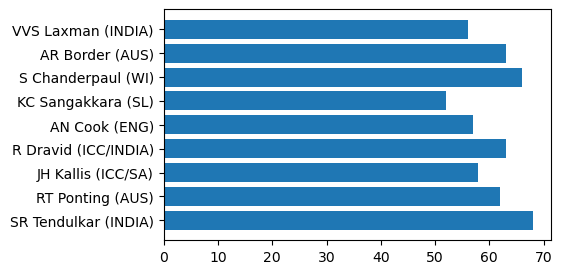

In [71]:
plt.rcParams['figure.figsize']=(5,3)
plt.barh(fifty['Player'],fifty['Fifty'],align='center')

<Axes: xlabel='Player', ylabel='Fifty'>

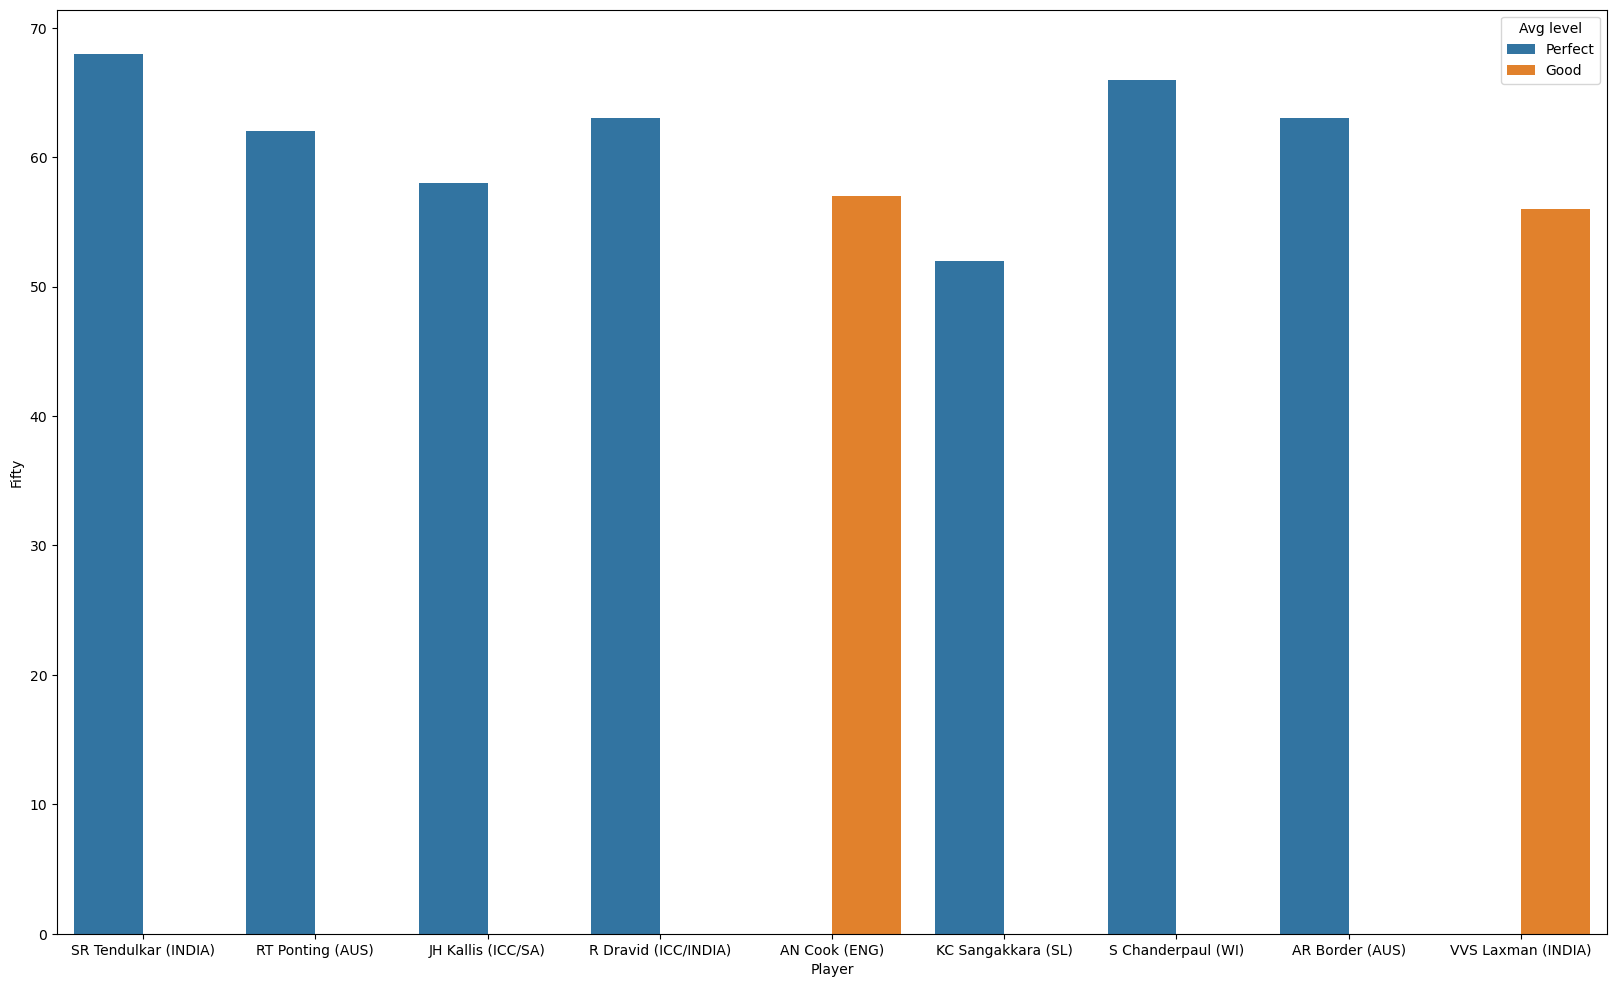

In [72]:
plt.rcParams['figure.figsize']=(20,12)
sns.barplot(x='Player',y='Fifty',data=fifty,hue='Avg level')

# Between 30 to 50 fifty's

In [73]:
range3050=data1.loc[(data1.Fifty<50) & (data1.Fifty>=30)]
range3050.reset_index(drop=True,inplace=True)

In [74]:
range3050

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F,Avg level
0,BC Lara (ICC/WI),1990-2006,131,232.0,6.0,11953.0,400*,52.88,34.0,48.0,17.0,5800.0,215.0,Perfect
1,SM Gavaskar (INDIA),1971-1987,125,214.0,16.0,10122.0,236*,51.12,34.0,45.0,12.0,5650.0,202.0,Perfect
2,Younis Khan (PAK),2000-2017,118,213.0,19.0,10099.0,313,52.05,34.0,33.0,19.0,5050.0,194.0,Perfect
3,HM Amla (SA),2004-2019,124,215.0,16.0,9282.0,311*,46.64,28.0,41.0,13.0,4850.0,202.0,Good
4,GC Smith (ICC/SA),2002-2014,117,205.0,13.0,9265.0,277,48.25,27.0,38.0,11.0,4600.0,194.0,Good
5,GA Gooch (ENG),1975-1995,118,215.0,6.0,8900.0,333,42.58,20.0,46.0,13.0,4300.0,202.0,Good
6,Javed Miandad (PAK),1976-1993,124,189.0,21.0,8832.0,280*,52.57,23.0,43.0,6.0,4450.0,183.0,Perfect
7,Inzamam-ul-Haq (ICC/PAK),1992-2007,120,200.0,22.0,8830.0,329,49.60,25.0,46.0,15.0,4800.0,185.0,Good
8,AB de Villiers (SA),2004-2018,114,191.0,18.0,8765.0,278*,50.66,22.0,46.0,8.0,4500.0,183.0,Perfect
9,V Sehwag (ICC/INDIA),2001-2013,104,180.0,6.0,8586.0,319,49.34,23.0,32.0,16.0,3900.0,164.0,Good


In [75]:
b=[]
for i in range3050['Player']:
    a=i.split()
    b.append(a[1])

In [76]:
range3050['Player']=b

C:\Users\gnane\AppData\Local\Temp\ipykernel_2304\1371978229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  range3050['Player']=b


<Axes: xlabel='Player', ylabel='Fifty'>

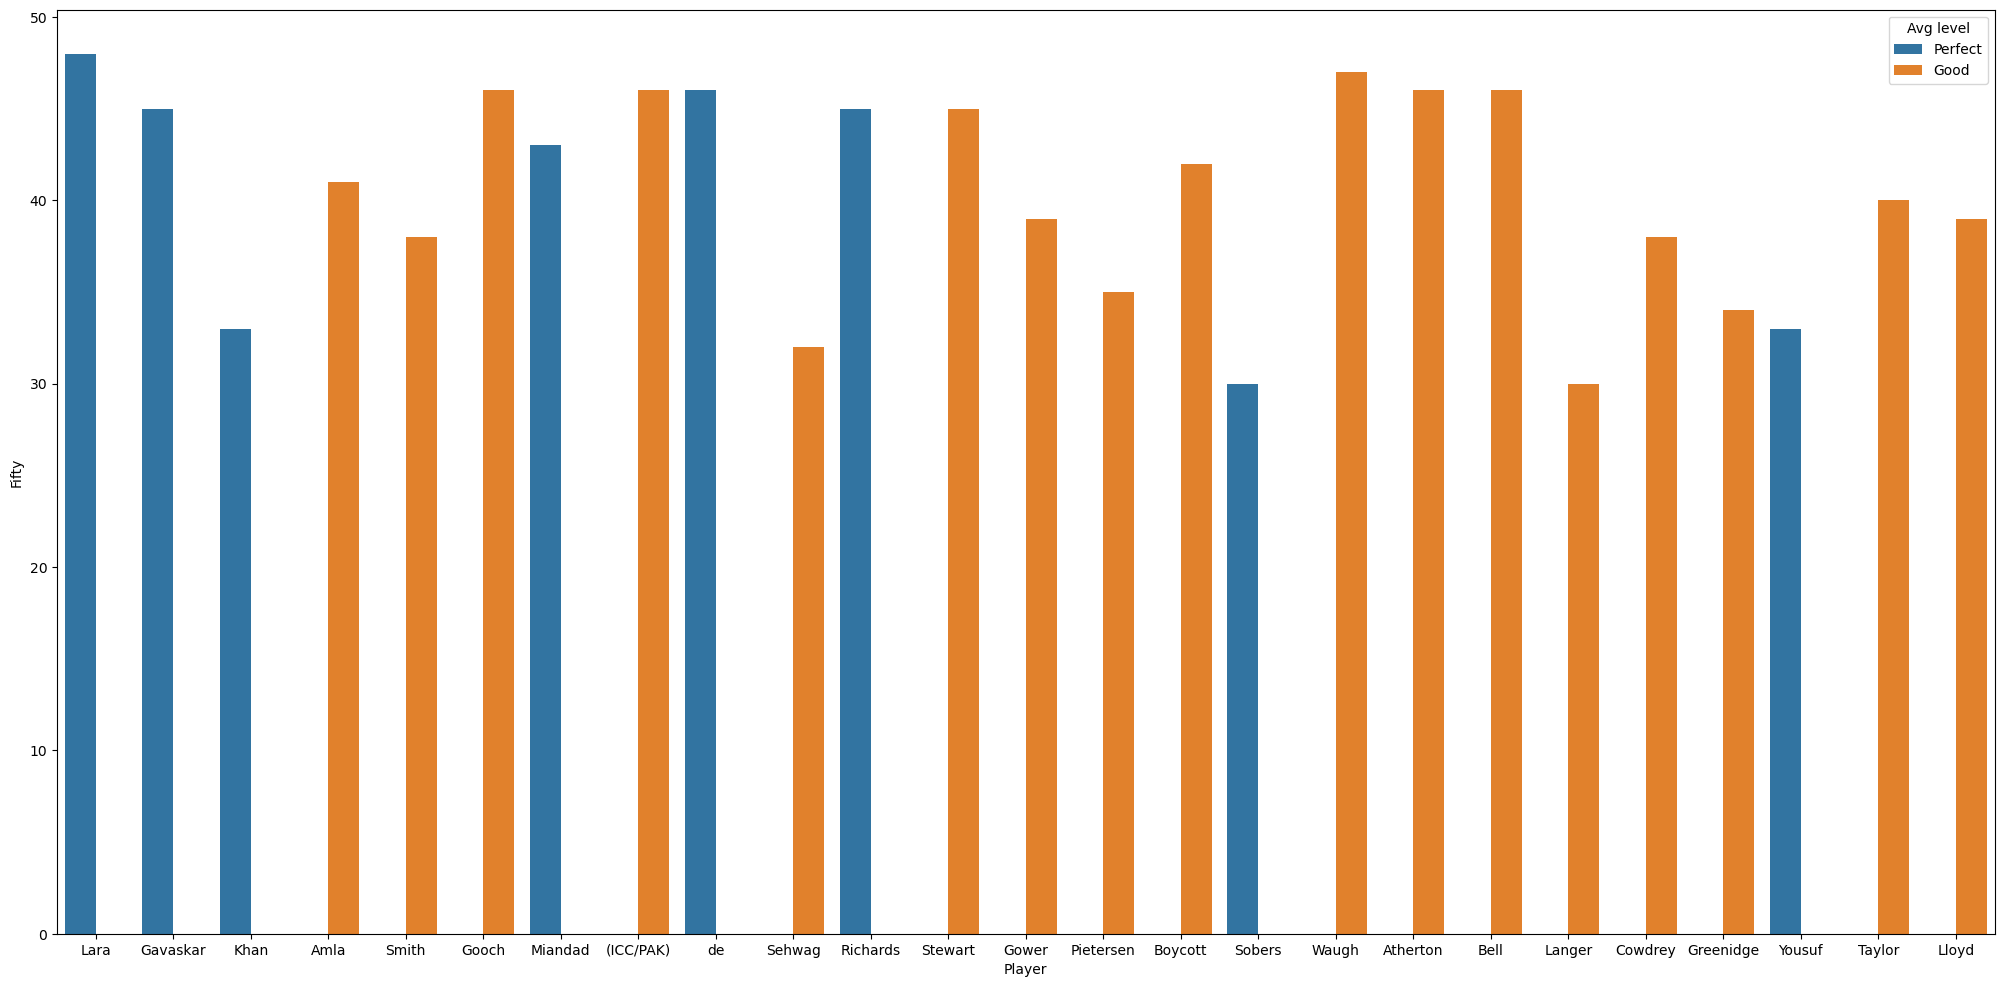

In [77]:
plt.rcParams['figure.figsize']=(25,12)
sns.barplot(x='Player',y='Fifty',data=range3050.head(25),hue='Avg level')

In [78]:
range3050

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F,Avg level
0,Lara,1990-2006,131,232.0,6.0,11953.0,400*,52.88,34.0,48.0,17.0,5800.0,215.0,Perfect
1,Gavaskar,1971-1987,125,214.0,16.0,10122.0,236*,51.12,34.0,45.0,12.0,5650.0,202.0,Perfect
2,Khan,2000-2017,118,213.0,19.0,10099.0,313,52.05,34.0,33.0,19.0,5050.0,194.0,Perfect
3,Amla,2004-2019,124,215.0,16.0,9282.0,311*,46.64,28.0,41.0,13.0,4850.0,202.0,Good
4,Smith,2002-2014,117,205.0,13.0,9265.0,277,48.25,27.0,38.0,11.0,4600.0,194.0,Good
5,Gooch,1975-1995,118,215.0,6.0,8900.0,333,42.58,20.0,46.0,13.0,4300.0,202.0,Good
6,Miandad,1976-1993,124,189.0,21.0,8832.0,280*,52.57,23.0,43.0,6.0,4450.0,183.0,Perfect
7,(ICC/PAK),1992-2007,120,200.0,22.0,8830.0,329,49.60,25.0,46.0,15.0,4800.0,185.0,Good
8,de,2004-2018,114,191.0,18.0,8765.0,278*,50.66,22.0,46.0,8.0,4500.0,183.0,Perfect
9,Sehwag,2001-2013,104,180.0,6.0,8586.0,319,49.34,23.0,32.0,16.0,3900.0,164.0,Good


# Below thirty 50's

In [79]:
below30=data1.loc[(data1.Fifty<30.0) & (data1.Fifty>10.0)]
below30.reset_index(drop=True,inplace=True)

In [80]:
below30

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F,Avg level
0,MJ Clarke (AUS),2004-2015,115,198.0,22.0,8643.0,329*,49.10,28.0,27.0,9.0,4150.0,189.0,Good
1,ML Hayden (AUS),1994-2009,103,184.0,14.0,8625.0,380,50.73,30.0,29.0,14.0,4450.0,170.0,Perfect
2,WR Hammond (ENG),1927-1947,85,140.0,16.0,7249.0,336*,58.45,22.0,24.0,4.0,3400.0,136.0,Perfect
3,V Kohli (INDIA),2011-2019,84,141.0,10.0,7202.0,254*,54.97,27.0,22.0,10.0,3800.0,131.0,Perfect
4,SPD Smith (AUS),2010-2019,72,130.0,16.0,7164.0,239,62.84,26.0,28.0,4.0,4000.0,126.0,Perfect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,NJ Contractor (INDIA),1955-1962,31,52.0,1.0,1611.0,108,31.58,1.0,11.0,2.0,650.0,50.0,Good
199,RH Catterall (SA),1922-1931,24,43.0,2.0,1555.0,120,37.92,3.0,11.0,3.0,850.0,40.0,Good
200,T Taibu (ZIM),2001-2012,28,54.0,3.0,1546.0,153,30.31,1.0,12.0,5.0,700.0,49.0,Good
201,KD Mackay (AUS),1956-1963,37,52.0,7.0,1507.0,89,33.48,0.0,13.0,6.0,650.0,46.0,Good


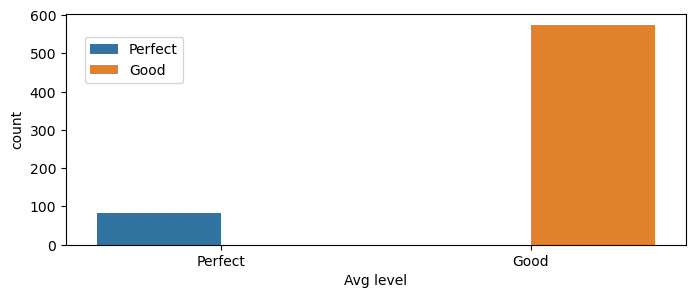

In [81]:
plt.rcParams['figure.figsize']=(8,3)
sns.countplot(x="Avg level",data=data1,hue='Avg level')
plt.legend(loc=(0.03,0.7))

C:\Users\gnane\AppData\Local\Temp\ipykernel_2304\3759370572.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),annot=True)


<Axes: >

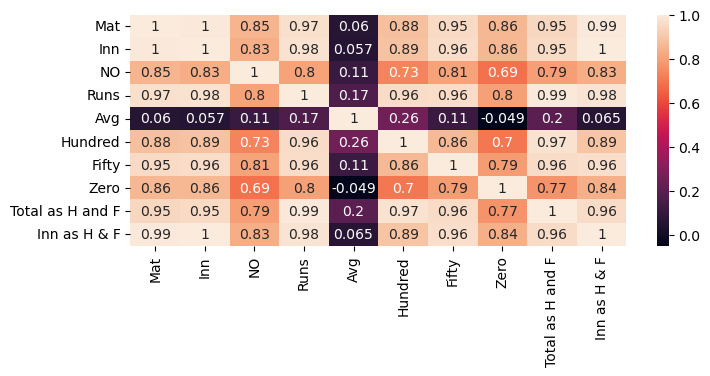

In [82]:
sns.heatmap(data1.corr(),annot=True)

Understand of boxplot:

maximum avaerage is approximately 65 (It means this players are number of played matches is above 50)

which players of average is Above 65 and this players are played matches is 50 or below 50 matches

so if played matches are increase average is decrease


# Decision Tree

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

Regression

In [84]:
x=data1.iloc[:,[2,7,8,9]]
y=data1.iloc[:,5]
x=np.asarray(x)
y=np.asarray(y)

In [85]:
x

array([[200.  ,  53.78,  51.  ,  68.  ],
       [168.  ,  51.85,  41.  ,  62.  ],
       [166.  ,  55.37,  45.  ,  58.  ],
       ...,
       [  2.  ,  30.  ,   0.  ,   1.  ],
       [  1.  ,  58.  ,   0.  ,   1.  ],
       [  2.  ,  51.  ,   0.  ,   1.  ]])

In [86]:
y

array([15921., 13378., 13289., 13288., 12472., 12400., 11953., 11867.,
       11814., 11174., 10927., 10122., 10099.,  9282.,  9265.,  8900.,
        8832.,  8830.,  8781.,  8765.,  8643.,  8625.,  8586.,  8540.,
        8463.,  8231.,  8181.,  8114.,  8032.,  8029.,  7728.,  7727.,
        7696.,  7624.,  7558.,  7530.,  7525.,  7515.,  7487.,  7422.,
        7359.,  7289.,  7249.,  7214.,  7212.,  7202.,  7172.,  7164.,
        7130.,  7110.,  7088.,  7037.,  6996.,  6973.,  6971.,  6868.,
        6806.,  6744.,  6453.,  6379.,  6361.,  6235.,  6227.,  6215.,
        6167.,  6149.,  6080.,  5949.,  5885.,  5842.,  5825.,  5807.,
        5768.,  5764.,  5762.,  5740.,  5719.,  5704.,  5570.,  5515.,
        5502.,  5492.,  5462.,  5444.,  5410.,  5357.,  5345.,  5334.,
        5312.,  5248.,  5234.,  5222.,  5200.,  5138.,  5105.,  5062.,
        4882.,  4876.,  4869.,  4794.,  4737.,  4702.,  4656.,  4555.,
        4554.,  4545.,  4537.,  4531.,  4528.,  4502.,  4455.,  4421.,
      

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [88]:
pd.DataFrame(x_train)

,0,1,2,3
0,23.0,30.55,1.0,7.0
1,2.0,118.50,1.0,1.0
2,8.0,32.00,1.0,1.0
3,114.0,50.66,22.0,46.0
4,29.0,31.57,1.0,6.0
...,...,...,...,...
521,21.0,31.14,1.0,4.0
522,58.0,33.28,6.0,22.0
523,164.0,51.37,30.0,66.0
524,49.0,36.39,3.0,18.0


In [89]:
pd.DataFrame(y_train)

,0
0,1100.0
1,237.0
2,416.0
3,8765.0
4,1105.0
...,...
521,872.0
522,3428.0
523,11867.0
524,2657.0


In [90]:
pd.DataFrame(x_test)

,0,1,2,3
0,78.0,50.06,17.0,28.0
1,6.0,37.20,1.0,1.0
2,11.0,33.47,1.0,3.0
3,100.0,40.91,21.0,27.0
4,21.0,37.28,1.0,7.0
...,...,...,...,...
127,2.0,31.33,0.0,1.0
128,49.0,32.86,4.0,8.0
129,25.0,30.03,1.0,7.0
130,5.0,34.00,0.0,1.0


In [91]:
pd.DataFrame(y_test)

,0
0,5807.0
1,372.0
2,636.0
3,7037.0
4,1044.0
...,...
127,94.0
128,1906.0
129,961.0
130,170.0


In [92]:
clas=DecisionTreeClassifier()
reg=DecisionTreeRegressor()

In [93]:
reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [94]:
prd=reg.predict(x_test)
pd.DataFrame(prd)

,0
0,5885.0
1,470.0
2,624.0
3,6361.0
4,1146.0
...,...
127,112.0
128,2109.0
129,1239.0
130,215.0


In [96]:
pd.DataFrame(prd)

,0
0,5885.0
1,470.0
2,624.0
3,6361.0
4,1146.0
...,...
127,112.0
128,2109.0
129,1239.0
130,215.0


In [97]:
from sklearn import metrics
ac=metrics.accuracy_score(y_test,prd)

In [98]:
ac

0.007575757575757576

Classification

In [99]:
x=data1.iloc[:,[2,7]]
y=data1.iloc[:,-1]

In [100]:
y

0      Perfect
1      Perfect
2      Perfect
3      Perfect
4         Good
        ...   
653       Good
654       Good
655       Good
656    Perfect
657    Perfect
Name: Avg level, Length: 658, dtype: object

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [102]:
clas.fit(x_train,y_train)

DecisionTreeClassifier()

In [103]:
prd1=clas.predict(x_test)

In [104]:
(prd1)

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good',
       'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Perfect', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Perfect',
       'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Perfect',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Perfect', 'Perfect', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Perfect', 'Perfect',
       'Good', 'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Perfect', 'Perfect', 'Good', 'Good', 'Go

In [105]:
ac=metrics.accuracy_score(y_test,prd1)

In [106]:
ac

1.0

Linear Regressionn

In [107]:
x=data1.iloc[:,[2,7,8,9]]
y=data1.iloc[:,5]
x=np.asarray(x)
y=np.asarray(y)

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [109]:
ln=LinearRegression()

In [110]:
ln.fit(x_train,y_train)

LinearRegression()

In [111]:
prd2=ln.predict(x_test)

In [112]:
pd.DataFrame(prd2)

,0
0,1081.570505
1,800.273302
2,636.623556
3,8965.230225
4,2984.623898
...,...
127,1733.083919
128,6333.729362
129,461.955893
130,1296.734969


# Logistic regression

In [113]:
x=data1.iloc[:,[2,7,8,9]]
y=data1.iloc[:,-1]

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [115]:
l_train,l_test,r_train,r_test=train_test_split(x,y,test_size=0.2,random_state=67)

In [116]:
model=LogisticRegression()
model.fit(l_train,r_train)

LogisticRegression()

In [117]:
prd=model.predict(l_test)

In [118]:
prd

array(['Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Perfect', 'Good', 'Perfect', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good',
       'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good',
       'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Perfect', 'Perfect', 'Good', 'Good', 'Good', 'Perfect', 'Good',
       'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
  

In [119]:
cm=confusion_matrix(r_test,prd)

In [120]:
cm

array([[118,   0],
       [  0,  14]], dtype=int64)

In [121]:
acc=accuracy_score(r_test,prd)

In [122]:
acc

1.0

# Random Forest

RandomForest classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
x=data1.iloc[:,[2,7,8,9]]
y=data1.iloc[:,-1]

In [125]:
r_train,r_test,f_train,f_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [126]:
rnd=RandomForestClassifier(n_estimators=50)

In [127]:
rnd.fit(r_train,f_train)

RandomForestClassifier(n_estimators=50)

In [128]:
prd1=rnd.predict(r_test)

In [129]:
prd1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Perfect', 'Good', 'Perfect', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good',
       'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Perfect', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Perfect', 'Good', 'Perfect', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good',
       'Good', 'Perfect', 'Perfect', 'Good', 'Perfect', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Perfect',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Goo

In [130]:
cm=confusion_matrix(f_test,prd1)

In [131]:
cm

array([[174,   0],
       [  0,  24]], dtype=int64)

In [132]:
acc=accuracy_score(f_test,prd1)

In [133]:
acc

1.0

RandomForest Regressor

In [134]:
from sklearn.ensemble import RandomForestRegressor

In [135]:
r=data1.iloc[:,[2,7,8,9]]
s=data1.iloc[:,5]

In [136]:
r_train,r_test,s_train,s_test=train_test_split(r,s,test_size=0.2,random_state=55)

In [137]:
rd=RandomForestRegressor()

In [138]:
rd.fit(r_train,s_train)

RandomForestRegressor()

In [139]:
prdr=rd.predict(r_test)

In [140]:
prdr

array([ 1088.11      ,   263.85      ,  1194.25      ,  1948.88      ,
        2839.37      ,  1078.69      ,  2135.88      ,  1219.25      ,
         732.42      ,  1071.71      ,  2485.59      ,  1196.23      ,
        1386.18      ,  5962.18      ,  2768.23      ,   748.61      ,
        1867.79      ,   862.1       ,  7187.02      , 11684.21      ,
        3930.6       ,  3430.52      ,   315.34      ,  1420.67      ,
         450.25      ,  2761.06      ,   451.21      ,   863.02      ,
        6300.19      ,   398.2       ,  2264.24      ,   652.77      ,
         300.32      ,  3413.        ,   863.33      ,  1158.49      ,
       10537.51      ,   104.21666667,  1226.81      ,  7713.89      ,
        1111.64      ,  1706.09      ,  1059.41      ,  3190.96      ,
        2702.81      ,  3864.41      ,   525.61      ,  7453.24      ,
        1852.79      ,   389.64      ,   222.54      ,  2135.35      ,
          66.73666667,   949.98      ,  3028.52      ,  7383.69      ,
      

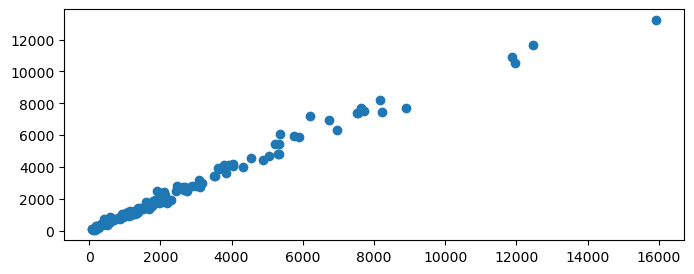

In [141]:
plt.scatter(s_test,prdr)

# Naive Bayes 

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report

In [143]:
x=data1.iloc[:,[2,7,8,9]]
y=data1.iloc[:,-1]

In [144]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=43)

In [145]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

In [146]:
model=GaussianNB()

In [147]:
model.fit(xtrain,ytrain)

GaussianNB()

In [148]:
prd=model.predict(xtest)

In [149]:
prd

array(['Good', 'Good', 'Perfect', 'Good', 'Good', 'Perfect', 'Good',
       'Good', 'Good', 'Perfect', 'Good', 'Perfect', 'Good', 'Good',
       'Perfect', 'Good', 'Good', 'Perfect', 'Perfect', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Perfect', 'Good', 'Perfect', 'Good', 'Good',
       'Perfect', 'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good',
       'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good',
 

In [150]:
accuracy_score(ytest,prd)

0.9343434343434344

In [151]:
c=classification_report(ytest,prd)

In [152]:
print("\n",c)


               precision    recall  f1-score   support

        Good       0.98      0.94      0.96       177
     Perfect       0.64      0.86      0.73        21

    accuracy                           0.93       198
   macro avg       0.81      0.90      0.85       198
weighted avg       0.95      0.93      0.94       198



# K-Nearest Neighbours

In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
x=data1.iloc[:,[2,7,8,9]]
y=data1.iloc[:,-1]

In [155]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=30)


In [156]:
b_k=None
b_a=0

In [157]:
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,xtrain,ytrain,cv=5)
    print(scores)
    m_a=np.mean(scores)
    print(m_a)
    if m_a>b_a:
        b_a=m_a
        b_k=k

[0.9673913  0.97826087 0.9673913  0.94565217 0.97826087]
0.9673913043478262
[0.97826087 0.95652174 0.97826087 0.9673913  0.93478261]
0.9630434782608696
[0.9673913  0.98913043 0.9673913  0.9673913  0.9673913 ]
0.9717391304347827
[0.95652174 0.9673913  0.9673913  0.9673913  0.9673913 ]
0.9652173913043478
[0.94565217 0.98913043 0.9673913  0.9673913  0.97826087]
0.9695652173913043
[0.95652174 0.9673913  0.9673913  0.93478261 0.97826087]
0.9608695652173914
[0.94565217 0.9673913  0.9673913  0.95652174 0.98913043]
0.9652173913043478
[0.95652174 0.95652174 0.9673913  0.94565217 0.9673913 ]
0.9586956521739131
[0.95652174 0.95652174 0.9673913  0.95652174 0.9673913 ]
0.9608695652173914
[0.95652174 0.92391304 0.9673913  0.94565217 0.9673913 ]
0.9521739130434783
[0.94565217 0.95652174 0.9673913  0.95652174 0.9673913 ]
0.9586956521739131
[0.95652174 0.91304348 0.95652174 0.92391304 0.9673913 ]
0.9434782608695652
[0.95652174 0.94565217 0.95652174 0.92391304 0.9673913 ]
0.95
[0.91304348 0.92391304 0.9

In [158]:
b_k

3

In [159]:
bknn=KNeighborsClassifier(n_neighbors=b_k)

In [160]:
bknn=bknn.fit(xtrain,ytrain)

In [161]:
prd=bknn.predict(xtest)

In [162]:
pd.DataFrame(prd)

,0
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
193,Good
194,Good
195,Good
196,Perfect


In [163]:
r=data1.iloc[:,[2,7,8,9]]
s=data1.iloc[:,5]

In [164]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()

params={'alpha':[1e-15,1e-10,0.001,0.01,10,40,100,0.00001]}
ridre=GridSearchCV(ridge,params,cv=5)
ridre.fit(r,s)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 0.001, 0.01, 10, 40, 100,
                                   1e-05]})

In [165]:
print(ridre.best_params_)
print(ridre.best_score_)

{'alpha': 1e-15}
0.69734642229093


In [166]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()

params={'alpha':[1e-15,1e-10,0.001,0.01]}
lasso=GridSearchCV(lasso,params,cv=5)
lasso.fit(r,s)

C:\Users\gnane\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.894e+06, tolerance: 6.210e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\gnane\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+07, tolerance: 4.253e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\gnane\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.118e+07, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 0.001, 0.01]})

In [167]:
print(lasso.best_params_)
print(lasso.best_score_)

{'alpha': 1e-15}
0.6973464222909322


In [168]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [169]:
x=data1.iloc[:,[2,7,8,9]]
y=data1.iloc[:,-1]

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=56)

In [171]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [172]:
nm=MLPClassifier(hidden_layer_sizes=(10,),max_iter=1100,random_state=59)

In [173]:
nm.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1100, random_state=59)

In [174]:
nm.score(x_test,y_test)

0.9848484848484849

In [175]:
train_ac=[]
check_ac=[]

In [176]:
for epoch in range(1,101):
    nm.fit(x_train,y_train)
    train_ac.append(nm.score(x_train,y_train))
    check_ac.append(nm.score(x_test,y_test))

In [177]:
acc=nm.score(x_test,y_test)

In [178]:
acc

0.9848484848484849

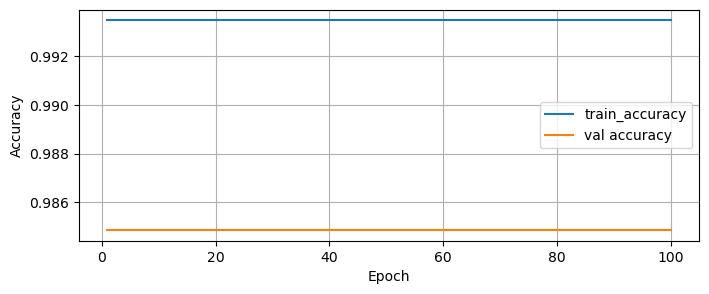

In [179]:
plt.plot(range(1,101),train_ac,label="train_accuracy")
plt.plot(range(1,101),check_ac,label="val accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)